In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

# Path to current directory
path_to_current_dir = os.getcwd()

def generate_and_save_data(num_files=100, sigma_range=(0.1, 0.8), mu_range=(0, 100), snr_range=(0.001, 1), directory=path_to_current_dir):
    t = np.linspace(0,100,2000)

    def signal(sigma, mu, t):
        f = (5 / (sigma * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((t - mu)/sigma)**2)
        return f

    def noise(t):
        Noise = (np.sin(1.0 * 2 * np.pi * t) + 0.5 * np.cos(3.0 * 2 * np.pi * t)) * np.random.randn(2000)
        return Noise

    for i in range(num_files):
        sigma = np.random.uniform(low=sigma_range[0], high=sigma_range[1])
        mu = np.random.uniform(low=mu_range[0], high=mu_range[1])
        expected_signal = signal(sigma, mu, t)
        Noise = noise(t)
        Noise_signal = Noise + expected_signal
        signal_to_noise_ratio = np.mean(expected_signal)/np.mean(Noise_signal)

        label_noise = r'$S/N={%.2f}$' % (signal_to_noise_ratio)
        label_signal = r'$\sigma$=%.2f, $\mu$=%.2f' % (sigma, mu)
        
        fig, axs = plt.subplots(2, sharex=True, sharey=True, figsize=(16,9))
        axs[0].plot(t, expected_signal, label = label_signal, color = 'r')
        axs[0].set_title('Signal')
        axs[0].legend(loc='upper right')
        axs[1].plot(t, Noise_signal, label =label_noise, color = 'b')
        axs[1].set_title('Corrupted Signal')
        axs[1].legend(loc='upper right')
        for axs in axs.flat:
            axs.set(xlabel='time', ylabel='Amplitude')
        plt.show()  # Show plots

        # save data to csv
        df = pd.DataFrame({'Time': t, 'Noise_Signal': Noise_signal})
        filename = os.path.join(directory, f'noise_data_{i}.csv')
        df.to_csv(filename, index=False)
        print(f'Data saved to {filename}')

# Usage:
#
print(path_to_current_dir)

c:\Users\12031\Desktop\Grand\Github\ML_efield_recons


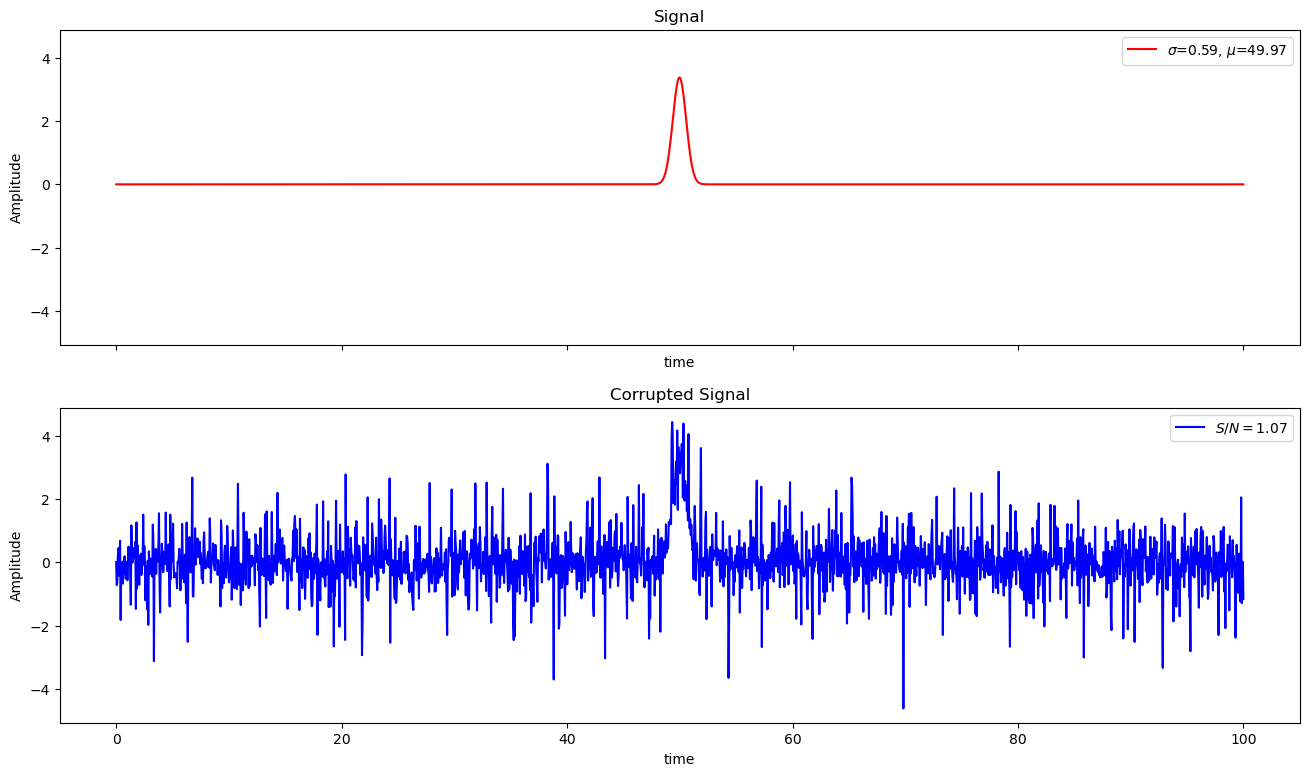

Data saved to c:\Users\12031\Desktop\Grand\Github\ML_efield_recons\Data\noise_data_0.csv


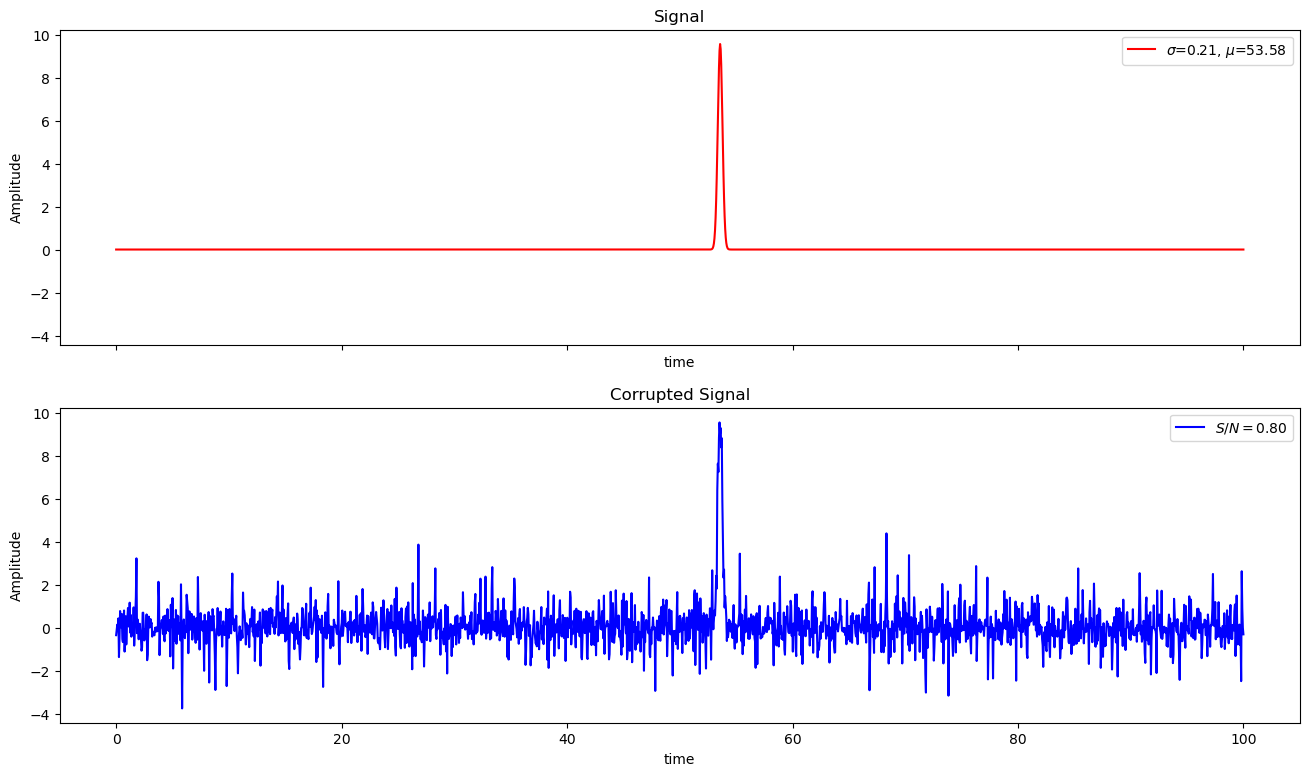

Data saved to c:\Users\12031\Desktop\Grand\Github\ML_efield_recons\Data\noise_data_1.csv


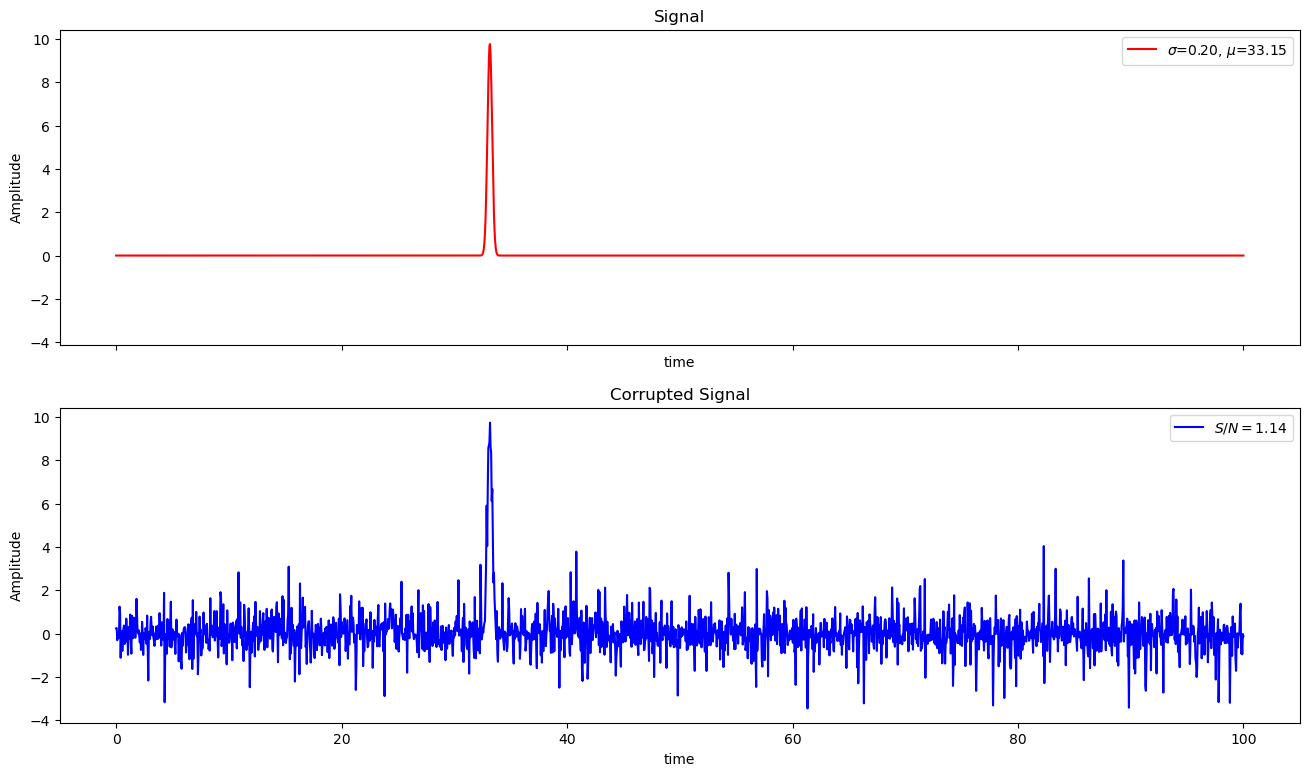

Data saved to c:\Users\12031\Desktop\Grand\Github\ML_efield_recons\Data\noise_data_2.csv


In [4]:
generate_and_save_data(num_files=3, directory= r"c:\Users\12031\Desktop\Grand\Github\ML_efield_recons\Data")